# 1- Lojistik Regresyon (Logistic Regression)

## TEORİ

**Amaç, sınıflandırma problemi için bağımlı ve bağımsız değişkenler arasındaki ilişkiyi tanımlayan doğrusal bir model kurmaktır.**

Veri bilimcileri yeni bir sınıflandırma problemi ile karşılaştıklarında akıllarına gelebilecek ilk algoritma Lojistik Regresyondur. Ayrık bir sınıf kümesine ilişkin gözlemleri tahmin etmek için kullanılan denetimli bir öğrenme sınıflandırma algoritmasıdır. 
Pratik olarak, gözlemleri farklı kategorilere ayırmak için kullanılır. Bu nedenle, çıktısı doğada ayrıktır. Lojistik Regresyon, Logit Regresyon olarak da adlandırılır. 

Sınıflandırma problemlerini çözmek için kullanılan en basit, anlaşılır ve çok yönlü sınıflandırma algoritmalarından biridir.

Lojistik Regresyon Varsayımları;
1. Lojistik Regresyon modeli, bağımlı değişkenin doğası gereği ikili, çok terimli veya sıralı olmasını gerektirir.
2. Gözlemlerin birbirinden bağımsız olmasını gerektirir. Bu nedenle, gözlemler tekrarlanan ölçümlerden gelmemelidir.
3. Lojistik Regresyon algoritması, bağımsız değişkenler arasında çok az çoklu bağlantı gerektirir veya hiç gerektirmez. Bu, bağımsız değişkenlerin birbirleriyle çok fazla ilişkili olmaması gerektiği anlamına gelir.
4. Lojistik Regresyon modeli, bağımsız değişkenlerin doğrusallığını ve log oranlarını varsayar.
5. Lojistik Regresyon modelinin başarısı örneklem büyüklüklerine bağlıdır. Tipik olarak, yüksek doğruluk elde etmek için büyük bir örnek boyutu gerektirir.

Lojistik Regresyon Türleri;
* İkili Lojistik Regresyon (Binary LR)
İkili Lojistik Regresyonda, hedef değişkenin iki olası kategorisi vardır. Yaygın kategori örnekleri evet veya hayır, iyi veya kötü, doğru veya yanlış, spam veya spam yok ve başarılı veya başarısızdır.
* Çok Terimli Lojistik Regresyon (Multinominal LR)
Çok Terimli Lojistik Regresyonda, hedef değişken belirli bir sırada olmayan üç veya daha fazla kategoriye sahiptir. Yani, üç veya daha fazla nominal kategori vardır. Örnekler meyve kategorilerini içerir - elma, mango, portakal ve muz.
* Sıralı Lojistik Regresyon (Ordinal LR)
Sıralı Lojistik Regresyonda, hedef değişkenin üç veya daha fazla sıra kategorisi vardır. Dolayısıyla, kategorilerle ilgili içsel bir düzen vardır. Örneğin, öğrenci performansı zayıf, orta, iyi ve mükemmel olarak kategorize edilebilir.

Özellikleri;
* Bağımlı değişken kategoriktir
* Adını, bağımlı değişkene uygulanan logit dönüşümden alır
* Doğrusal Regresyonda aranan varsayımlar burada aranmadığı için daha esnek kullanılabilirliği vardır.
* Bağımlı değişkenin 1 olarak tanımlanan değerinin gerçekleşme olasılığı hesaplanır. Dolayısıyla bağımlı değişkenin alacağı değer ile ilgilenilmez
* Lojistik fonksiyonu sayesinde üretilen değerler 0-1 arasında olur.

## UYGULAMA

### Verisetinin İncelenmesi ve Manipüle Edilmesi

* Kullanılan kütüphanelerin dahil edilmesi

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from warnings import filterwarnings
filterwarnings('ignore', category = UserWarning)

* Verisetini [buradan](https://mrkizmaz-s3data.s3.eu-west-1.amazonaws.com/DataSets/diabetes.csv) indirebilirsiniz.

In [2]:
url = "https://mrkizmaz-s3data.s3.eu-west-1.amazonaws.com/DataSets/diabetes.csv"
diabets = pd.read_csv(url)
df = diabets.copy()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info() # veriseti bilgisi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isnull().values.any() # verisetinde bos veya eksik degerler var mı?

False

In [5]:
df['Outcome'].value_counts() # outcome degerlerinin durumu

0    500
1    268
Name: Outcome, dtype: int64

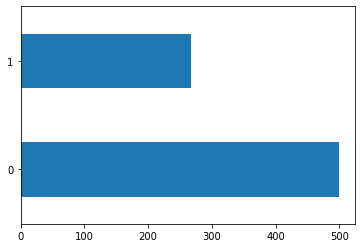

In [6]:
df['Outcome'].value_counts().plot.barh(); # görsel seklinde

In [7]:
df.describe().T # verisetinin istatiksel bilgileri

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Statsmodels ile Modelleme

In [8]:
X = df.drop(['Outcome'], axis = 1) # outcome dısındaki bagımsız degiskenler
y = df['Outcome'] # bagımlı degisken

In [9]:
# model olusturulması ve fit edilmesi
loj = sm.Logit(y, X).fit()
print(loj.summary())

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Thu, 17 Mar 2022   Pseudo R-squ.:                 0.05922
Time:                        18:30:12   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072

In [10]:
loj.params # katsayı degerleri

Pregnancies                 0.128418
Glucose                     0.012936
BloodPressure              -0.030326
SkinThickness               0.000196
Insulin                     0.000739
BMI                        -0.004814
DiabetesPedigreeFunction    0.320284
Age                        -0.015635
dtype: float64

In [11]:
loj.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Pregnancies,0.1284,0.029,4.484,0.000,0.072,0.185
Glucose,0.0129,0.003,4.757,0.000,0.008,0.018
BloodPressure,-0.0303,0.005,-6.481,0.000,-0.039,-0.021
SkinThickness,0.0002,0.006,0.032,0.974,-0.012,0.012
Insulin,0.0007,0.001,0.942,0.346,-0.001,0.002
BMI,-0.0048,0.011,-0.449,0.653,-0.026,0.016
DiabetesPedigreeFunction,0.3203,0.240,1.335,0.182,-0.150,0.790
Age,-0.0156,0.008,-1.852,0.064,-0.032,0.001


### ScikitLearn ile Modelleme

In [32]:
X = df.drop(['Outcome'], axis = 1) # outcome dısındaki bagımsız degiskenler
y = df['Outcome'] # bagımlı degisken

logistic = LogisticRegression(solver = 'liblinear')
logistic = logistic.fit(X, y)
logistic

LogisticRegression(solver='liblinear')

In [33]:
logistic.intercept_ # sabit katsayı degeri

array([-5.89212554])

In [34]:
logistic.coef_ # katsayı degerleri

array([[ 1.17059450e-01,  2.83884031e-02, -1.68885725e-02,
         7.55607614e-04, -6.42806793e-04,  5.97696531e-02,
         6.77531133e-01,  7.24068248e-03]])

### Tahminleme

In [35]:
y_pred = logistic.predict(X)
confusion_matrix(y, y_pred) # dogruluk skoru

array([[448,  52],
       [121, 147]])

In [36]:
accuracy_score(y, y_pred) # dogru sınıflandırma oranı

0.7747395833333334

In [37]:
print(classification_report(y, y_pred)) # sınıflandırma algoritmaları

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [38]:
logistic.predict(X)[0:10] # tahminler

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0])

In [39]:
logistic.predict_proba(X)[0:10] # tahminlerin olasılık degerleri (sol:0, sag:1)

array([[0.35039797, 0.64960203],
       [0.91702822, 0.08297178],
       [0.22475035, 0.77524965],
       [0.92139544, 0.07860456],
       [0.16725564, 0.83274436],
       [0.7989943 , 0.2010057 ],
       [0.88019976, 0.11980024],
       [0.27812667, 0.72187333],
       [0.32059311, 0.67940689],
       [0.92274337, 0.07725663]])

In [40]:
y[0:10] # gercek degerler

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [41]:
# 1 olma olasılıgının degerleri
y_probs = logistic.predict_proba(X)
y_probs = y_probs[:,1]
y_probs[0:10]

array([0.64960203, 0.08297178, 0.77524965, 0.07860456, 0.83274436,
       0.2010057 , 0.11980024, 0.72187333, 0.67940689, 0.07725663])

In [42]:
y_pred = [1 if i > 0.5 else 0 for i in y_probs]
y_pred[0:10]

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

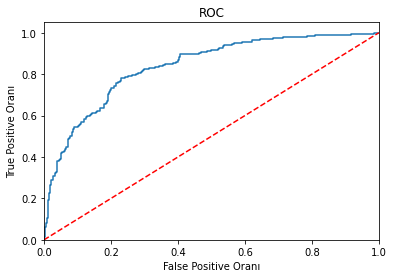

In [43]:
# ROC egrisinin cizimi
logit_roc_auc = roc_auc_score(y, logistic.predict(X))

fpr, tpr, thresholds = roc_curve(y, logistic.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [45]:
# roc-auc skoru (en iyi deger:1)
roc_auc = roc_auc_score(y, logistic.predict_proba(X)[:,1])
roc_auc

0.8369402985074628

### Model Tuning

In [46]:
# %20'i test, %80'i egitim seti
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)
# model kurulumu
logmodel = LogisticRegression(solver = 'liblinear')
logmodel = logmodel.fit(X_train, y_train)
logmodel

LogisticRegression(solver='liblinear')

In [47]:
y_pred = logmodel.predict(X_test)
score = accuracy_score(y_test, y_pred) # dogruluk skoru
score

0.7597402597402597

In [49]:
# tahmin degerlerinin olaslıklarının dataframe dönüstürülmesi
predProba = logmodel.predict_proba(X_test)[0:10]

predProba_df = pd.DataFrame(data = predProba, columns = ['Prob of 0', 'Prrob of 1'])
predProba_df

,Prob of 0,Prrob of 1
0,0.663751,0.336249
1,0.780474,0.219526
2,0.822354,0.177646
3,0.770830,0.229170
4,0.572573,0.427427
5,0.583277,0.416723
6,0.945776,0.054224
7,0.304469,0.695531
8,0.485467,0.514533
9,0.336808,0.663192


In [48]:
# cross validation ile dogruluk skoru
cross_val_score(logmodel, X_test, y_test, cv = 10, scoring = 'accuracy').mean()

0.7925

## SONUÇ

Bu projede, belirli değerler göz önünde bulundurularak bir kişinin hasta olup olmadığını tahmin etmek için Lojistik Regresyon modeli kullanıldı.
* Logistic Regresyon ile uygulanan modelin dogruluk skoru: **0.7747395833333334**